In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
items_df = pd.read_csv('/content/drive/MyDrive/midterm_cs673/20191226-items.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/midterm_cs673/20191226-reviews.csv')

## Data description
The items_df contains 720 records of cell phones models from Amazon.com
We use columns: asin(ID), brand, model, and price.

The reviews_df contains 67986 reviews of cell phones from table items_df.
We will use asin(ID), rating, title, and body of review columns.

In [ ]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   url            720 non-null    object 
 4   image          720 non-null    object 
 5   rating         720 non-null    float64
 6   reviewUrl      720 non-null    object 
 7   totalReviews   720 non-null    int64  
 8   price          720 non-null    float64
 9   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 56.4+ KB


In [ ]:
items_df.head(1)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0


In [ ]:
reviews_df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


In [ ]:
reviews_df.head(1)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0


# Data preparation

The amount of reviews by brand shows that Apple, Google, Motorola, Nokia, and Samsung have the most reviews.\
But we decided to analyze Apple, Google and Samsung only because in our opinion these are the most popular brand in the USA right now.\
So, further analysis is a comparison of these three brands.

In [ ]:
reviews_df.merge(items_df[['asin', 'brand']], on = 'asin').groupby('brand').agg({'asin':'count'})

,asin
brand,
ASUS,251
Apple,5145
Google,3787
HUAWEI,2225
Motorola,8880
Nokia,5915
OnePlus,347
Samsung,33629
Sony,3196


## Item table

In [ ]:
# filtering by brand
items_df = items_df.loc[items_df['brand'].isin(['Apple', 'Samsung', 'Google'])]

In [ ]:
# deleting columns which we are not going to use
items_df.drop(['url', 'image', 'reviewUrl', 'originalPrice', 'rating',	'totalReviews'],axis=1, inplace=True)

<ipython-input-10-0c12c37fc34f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df.drop(['url', 'image', 'reviewUrl', 'originalPrice', 'rating',	'totalReviews'],axis=1, inplace=True)


In [ ]:
# deleting empty rows, for some models column 'Price' is equal to 0.
items_df = items_df.loc[items_df['price'] > 0]

[Text(0.5, 1.0, 'Price histogram')]

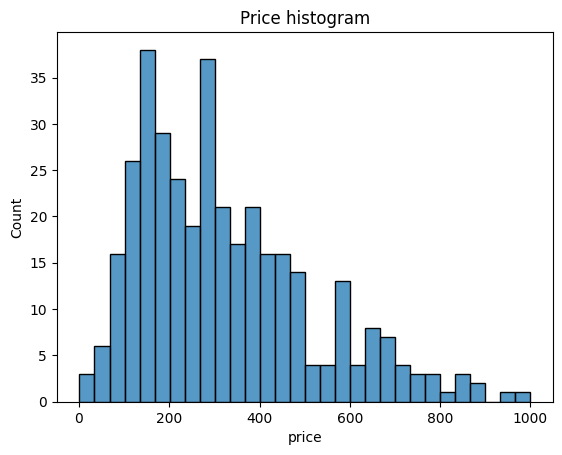

In [ ]:
sns.histplot(data=items_df, x="price",bins = 30).set(title='Price histogram')

<Axes: >

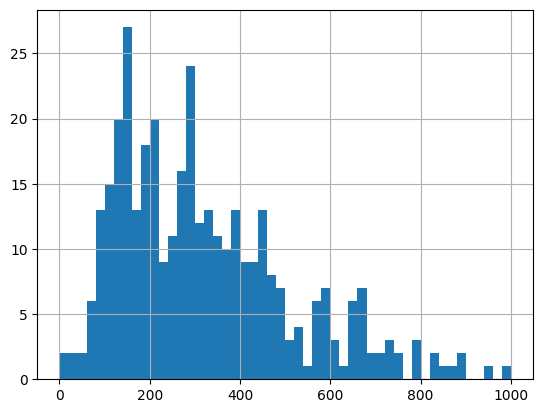

In [ ]:
items_df.price.hist(bins=50)

[Text(0.5, 1.0, 'Price histogram by brand')]

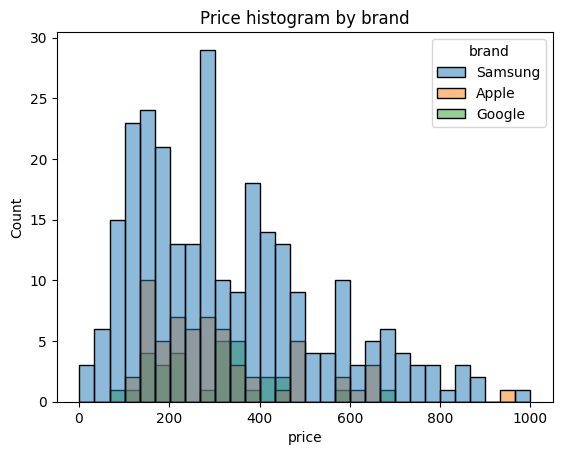

In [ ]:
sns.histplot(data=items_df, x="price", hue="brand",bins = 30).set(title='Price histogram by brand')

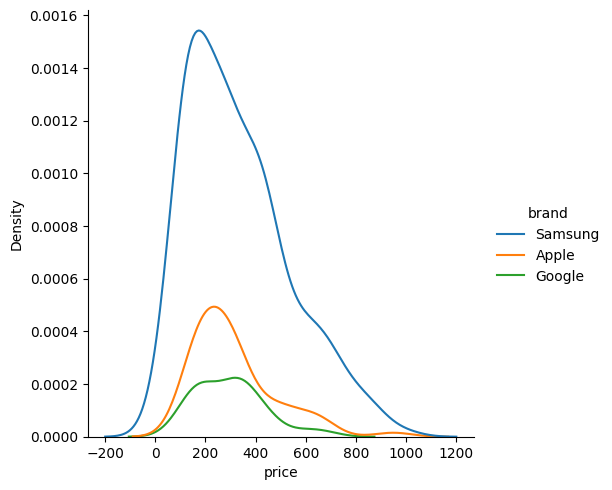

In [ ]:
sns.displot(data=items_df, x="price", hue="brand", kind="kde")

In [ ]:
items_df.price.mean()

324.3075069252077

The price historgam shows that price distributed between 1 USD and 1000 USD.\
The mean price is 324.30 USD


In [ ]:
duplicate = items_df[items_df.duplicated(keep = 'last')]

In [ ]:
print('Amount of duplicates in table items_df:', len(duplicate))

Amount of duplicates in table items_df: 0


In [ ]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 10 to 719
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   asin    361 non-null    object 
 1   brand   361 non-null    object 
 2   title   361 non-null    object 
 3   price   361 non-null    float64
dtypes: float64(1), object(3)
memory usage: 22.2+ KB


<Axes: xlabel='price', ylabel='brand'>

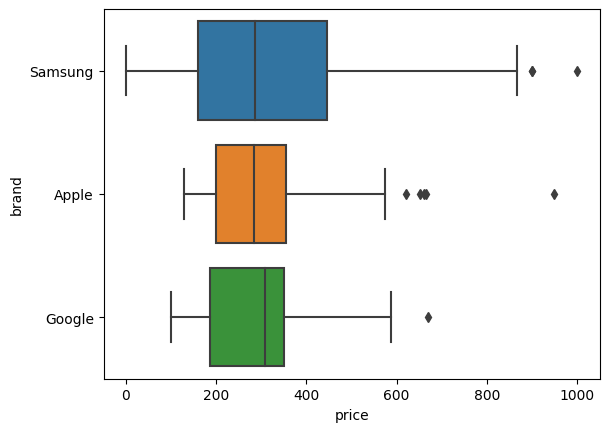

In [ ]:
sns.boxplot(data=items_df, x="price", y="brand")

The boxplot shows that price distributed similarly.\
Distribution of samsung price is quite wider, but we think it is not going to be a problemm because the magority of data is concentrated between aproximitly 200 USD and 400 USD for all brands.   

After data clining and perparation the table items_df has 361 rows(361 cell-phone models)\
and 4 columns: asin(ID), brand, model, and price.

## Review table

In [ ]:
# deleting columns which we are not going to use
reviews_df.drop(['helpfulVotes', 'verified', 'name', 'date'],axis=1, inplace=True)

In [ ]:
# dropping NA rows
reviews_df.dropna(inplace = True)

In [ ]:
duplicate = reviews_df[reviews_df.duplicated(keep = 'last')]

In [ ]:
print('Amount of duplicates in table items_df:', len(duplicate))

Amount of duplicates in table items_df: 344


In [ ]:
# Table has 344 dublicates, we dropped them all
reviews_df.drop_duplicates(inplace = True)

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67612 entries, 0 to 67985
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   asin    67612 non-null  object
 1   rating  67612 non-null  int64 
 2   title   67612 non-null  object
 3   body    67612 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.6+ MB


After data clining and perparation the table reviews_df has 67612 rows(67612 reviews)\
and 4 columns: asin(ID), rating, heading and body of review.

In [ ]:
reviews_df['body'][10]

"I've had this phone for over a year and I really like it. Having never been partial to flip phones, I can appreciate this Nokia's features. The color screen is very nice and all of the features are easy to use. The keylock is a simple two-button sequence though I do wish it had a timer for the keylock like my old phone. It has a lot of useful features, like a calculator, organizer, stopwatch and alarm, but the three games it has are too lame to play. The customizable features are nice, but lacking in variety. This isn't the ideal phone for a guy. You're few options are pretty girly. The ringtones also lack something to be desired, but there are a few decent ones. The battery life is pretty good, nothing special, but definitely not bad. It gets me through the average day without problems and sometimes lasts for several days. My parents, sisters, and husband all got fancy Samsung flip phones with cameras and all the toys, and I must say mine works better. The battery lasts MUCH longer a

## Merged table
For futher analyzis we have to innerly mearge our tables by asin column.

In [ ]:
df = reviews_df.merge(items_df, on = 'asin')

In [ ]:
df.drop(['title_y'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33412 entries, 0 to 33411
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   asin     33412 non-null  object 
 1   rating   33412 non-null  int64  
 2   title_x  33412 non-null  object 
 3   body     33412 non-null  object 
 4   brand    33412 non-null  object 
 5   price    33412 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ MB


The amount of rows after merging is equal to 33412 rows because we cutted not currently popular cell phones.\

In [ ]:
duplicate = df[df.duplicated(keep = 'last')]

In [ ]:
print('Amount of duplicates in table df:', len(duplicate))

Amount of duplicates in table df: 0


In [ ]:
df.head()

,asin,rating,title_x,body,brand,price
0,B0033SFV5A,3,Three Stars,Missing wall charger!!! https://www.amazon.com...,Samsung,64.99
1,B0033SFV5A,4,Correction to my review,I accidentally put in my previous review that ...,Samsung,64.99
2,B0033SFV5A,1,IT IS A PREPAID PHONE,I too bought this phone as a replacement. I re...,Samsung,64.99
3,B0033SFV5A,3,Used,Didn't last long had to purchase a new phone,Samsung,64.99
4,B0033SFV5A,5,Also works with Selectel,This phone also worked with Selectel which is ...,Samsung,64.99


# Analysis

## EDA

For futher analysis we disigned custom list of "bad" words for sentiment analysis of reviews.

In [ ]:
# the words list definition
list_of_bad_words = ["Doesn't", 'Defective', 'Slow', 'annoying', 'fragile', 'bulky', 'Stupid', 'WARNING', 'Faulty',
                     'Terrible', 'Bad', 'Lousy', 'Worst',  'NEVER', "Don't", "Didn't", 'Junk', 'WORSE', 'Horrible', 'Avoid', 'Stopped',
                     'ripped', 'drawback', 'Failed', 'black screen', 'returning', 'crap', 'Waste', 'Defects', 'Burned', 'Returned', 'Collapsed', 'Disappointed']

In [ ]:
# making all list lower case
lower_list = []
for w in list_of_bad_words:
  lower_list.append(w.lower())

In [ ]:
# define a function for counting of amount of words in a review
def count_words(review):
  text = review.split()
  return len(text)

In [ ]:
# define a function for counting of amount of "BAD" words in a review
def count_bad_words(review):
  n = 0
  text = review.split()
  text = [x.lower() for x in text]
  for bad_word in lower_list:
    n += text.count(bad_word)
  return n

In [ ]:
df['number_words'] = df['body'].apply(count_words)

In [ ]:
df['number_bad_words'] = df['body'].apply(count_bad_words)

In [ ]:
df.drop(['title_x', 'body'], axis = 1, inplace = True)

In [ ]:
corr_matrix=df[['price',	'rating', 'number_words', 'number_bad_words']].corr()

<Axes: >

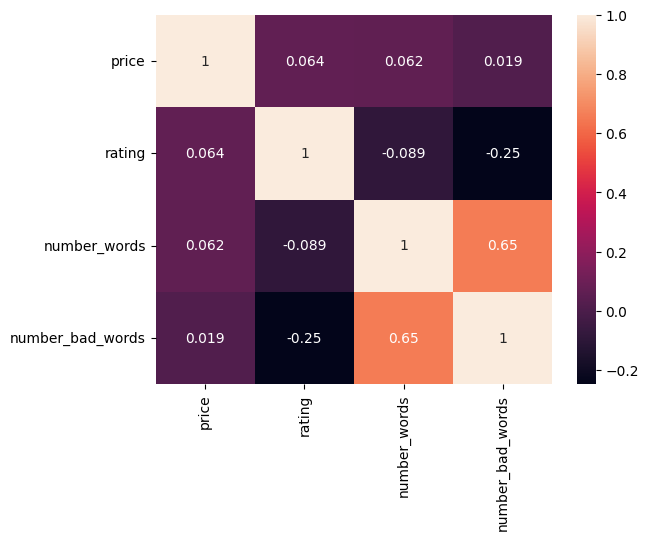

In [ ]:
sns.heatmap(corr_matrix,annot=True)

The rating and number of bad words have a weak negative correlation.


In [ ]:
agg_df=df.groupby('brand', as_index=False).agg({'rating':np.mean,'price':np.mean, 'number_words': np.mean, 'number_bad_words':np.mean})

In [ ]:
agg_df

,brand,rating,price,number_words,number_bad_words
0,Apple,3.706323,324.819866,32.269844,0.214694
1,Google,3.584980,260.572425,67.322981,0.584133
2,Samsung,3.782076,318.716293,43.264792,0.344089


Text(0.5, 1.0, 'Rating by brand')

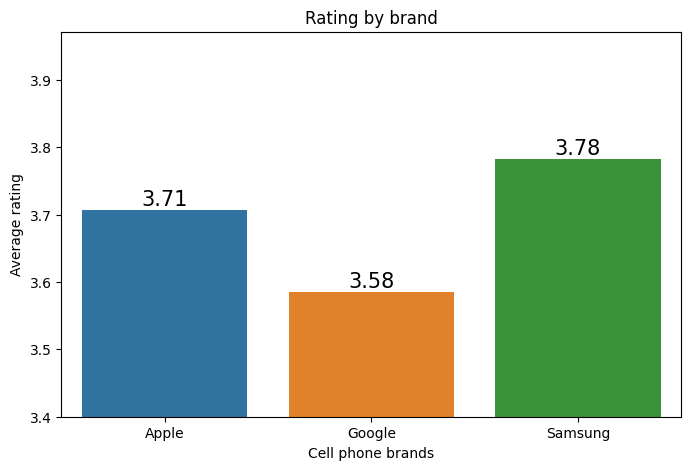

In [ ]:
plt.figure(figsize=(8, 5))
plots = sns.barplot(x="brand", y="rating", data=agg_df)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(bottom=3.4)
plt.xlabel("Cell phone brands")
plt.ylabel("Average rating")
plt.title("Rating by brand")

Text(0.5, 1.0, 'Average price by brand')

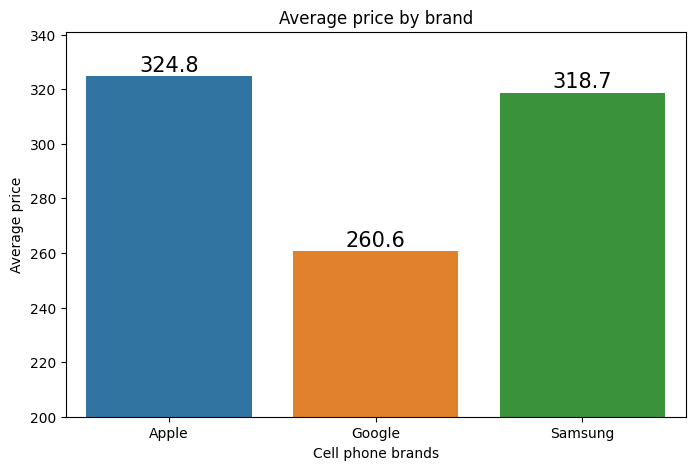

In [ ]:
plt.figure(figsize=(8, 5))
plots = sns.barplot(x="brand", y="price", data=agg_df)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(bottom=200)
plt.xlabel("Cell phone brands")
plt.ylabel("Average price")
plt.title("Average price by brand")

Text(0.5, 1.0, 'Average number of words by brand')

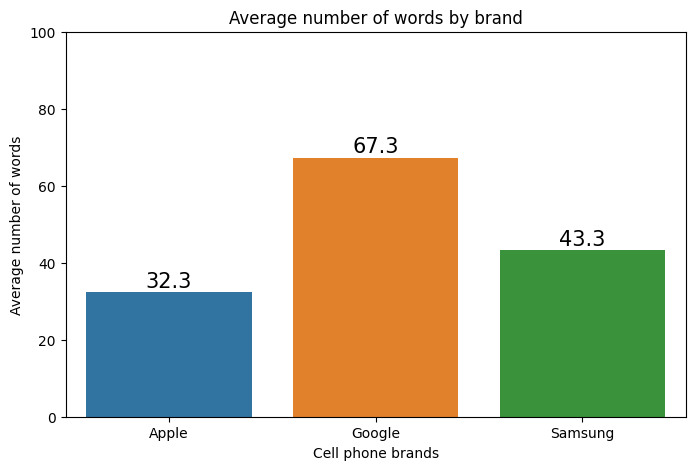

In [ ]:
plt.figure(figsize=(8, 5))
plots = sns.barplot(x="brand", y="number_words", data=agg_df)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(top=100)
plt.xlabel("Cell phone brands")
plt.ylabel("Average number of words")
plt.title("Average number of words by brand")

Text(0.5, 1.0, "Average number of 'bad' words by brand")

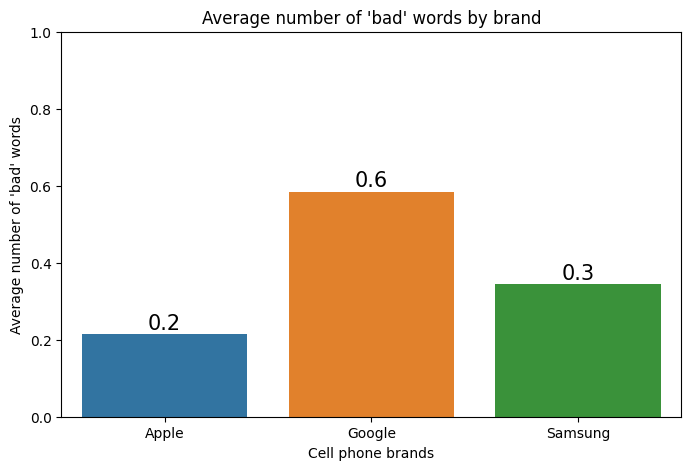

In [ ]:
plt.figure(figsize=(8, 5))
plots = sns.barplot(x="brand", y="number_bad_words", data=agg_df)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(top=1)
plt.xlabel("Cell phone brands")
plt.ylabel("Average number of 'bad' words")
plt.title("Average number of 'bad' words by brand")

In [ ]:
# calculating of portion of "BAD" words in a review
agg_df['%_of_bad_words'] = round(100*agg_df['number_bad_words']/agg_df['number_words'],2)

Text(0.5, 1.0, "Average percentage of 'bad' words by brand")

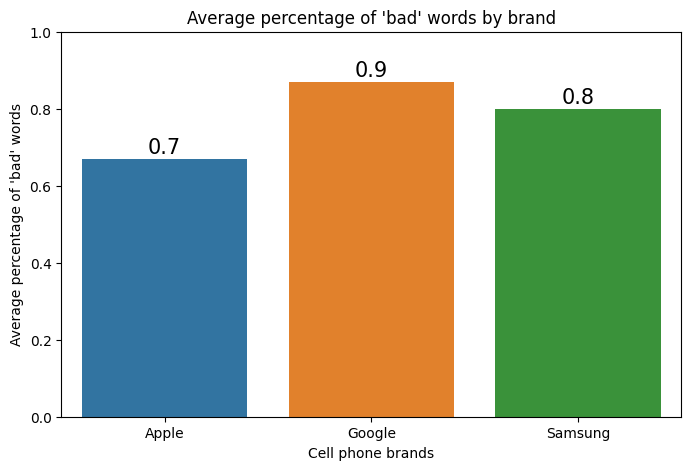

In [ ]:
plt.figure(figsize=(8, 5))
plots = sns.barplot(x="brand", y="%_of_bad_words", data=agg_df)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(top=1)
plt.xlabel("Cell phone brands")
plt.ylabel("Average percentage of 'bad' words")
plt.title("Average percentage of 'bad' words by brand")

In [ ]:
agg_df

,brand,rating,price,number_words,number_bad_words,%_of_bad_words
0,Apple,3.706323,324.819866,32.269844,0.214694,0.67
1,Google,3.584980,260.572425,67.322981,0.584133,0.87
2,Samsung,3.782076,318.716293,43.264792,0.344089,0.80


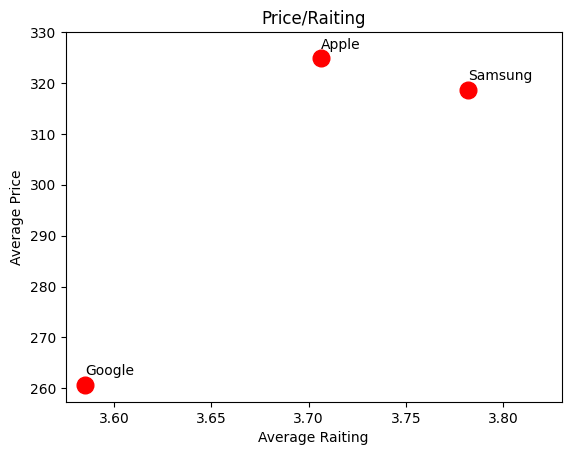

In [ ]:
plt.plot(agg_df['rating'], agg_df['price'], 'ro',markersize=12)
#plt.axis([0, 6, 0, 20])
text = ['Apple', 'Google', 'Samsung']
for i in range(3):
  plt.annotate(text[i], (agg_df['rating'][i], agg_df['price'][i] + 2))

plt.xlabel("Average Raiting")
plt.ylabel("Average Price")
plt.title("Price/Raiting")
plt.ylim(top=330)
plt.xlim(right=3.83)
plt.show()

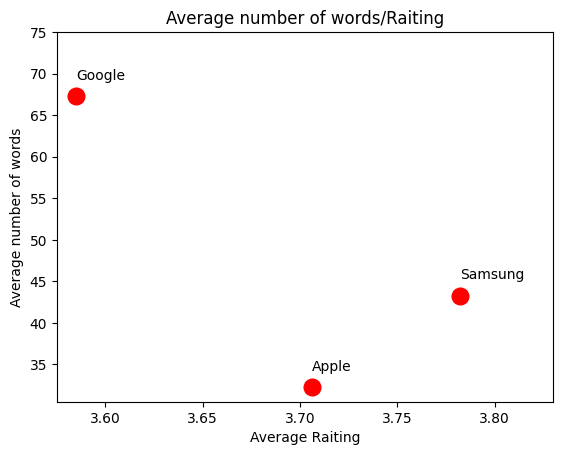

In [ ]:
plt.plot(agg_df['rating'], agg_df['number_words'], 'ro',markersize=12)
#plt.axis([0, 6, 0, 20])
text = ['Apple', 'Google', 'Samsung']
for i in range(3):
  plt.annotate(text[i], (agg_df['rating'][i], agg_df['number_words'][i] + 2))

plt.xlabel("Average Raiting")
plt.ylabel("Average number of words")
plt.title("Average number of words/Raiting")
plt.ylim(top=75)
plt.xlim(right=3.83)
plt.show()

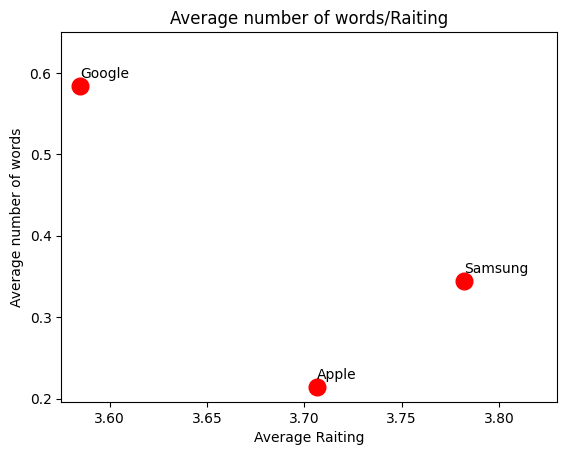

In [ ]:
plt.plot(agg_df['rating'], agg_df['number_bad_words'], 'ro',markersize=12)
#plt.axis([0, 6, 0, 20])
text = ['Apple', 'Google', 'Samsung']
for i in range(3):
  plt.annotate(text[i], (agg_df['rating'][i], agg_df['number_bad_words'][i] + 0.01))

plt.xlabel("Average Raiting")
plt.ylabel("Average number of words")
plt.title("Average number of words/Raiting")
plt.ylim(top=0.65)
plt.xlim(right=3.83)
plt.show()

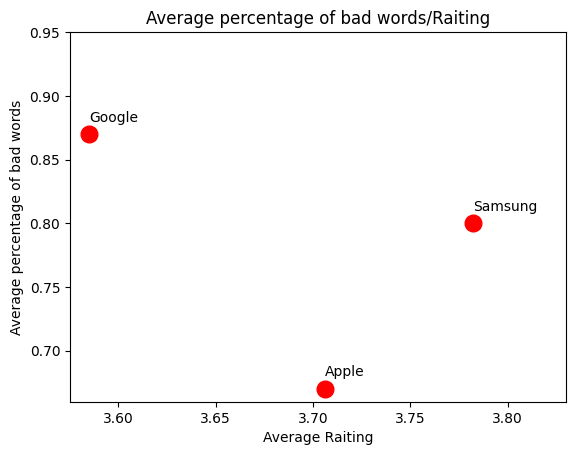

In [ ]:
plt.plot(agg_df['rating'], agg_df['%_of_bad_words'], 'ro',markersize=12)
#plt.axis([0, 6, 0, 20])
text = ['Apple', 'Google', 'Samsung']
for i in range(3):
  plt.annotate(text[i], (agg_df['rating'][i], agg_df['%_of_bad_words'][i] + 0.01))

plt.xlabel("Average Raiting")
plt.ylabel("Average percentage of bad words")
plt.title("Average percentage of bad words/Raiting")
plt.ylim(top=0.95)
plt.xlim(right=3.83)
plt.show()

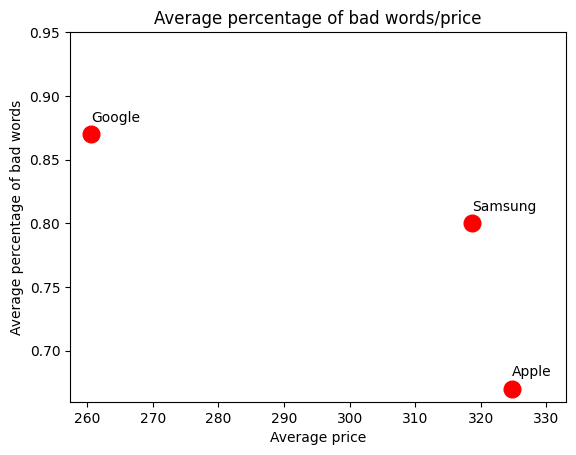

In [ ]:
plt.plot(agg_df['price'], agg_df['%_of_bad_words'], 'ro',markersize=12)
#plt.axis([0, 6, 0, 20])
text = ['Apple', 'Google', 'Samsung']
for i in range(3):
  plt.annotate(text[i], (agg_df['price'][i], agg_df['%_of_bad_words'][i] + 0.01))

plt.xlabel("Average price")
plt.ylabel("Average percentage of bad words")
plt.title("Average percentage of bad words/price")
plt.ylim(top=0.95)
plt.xlim(right=333)
plt.show()

# APPENDIX

<Axes: >

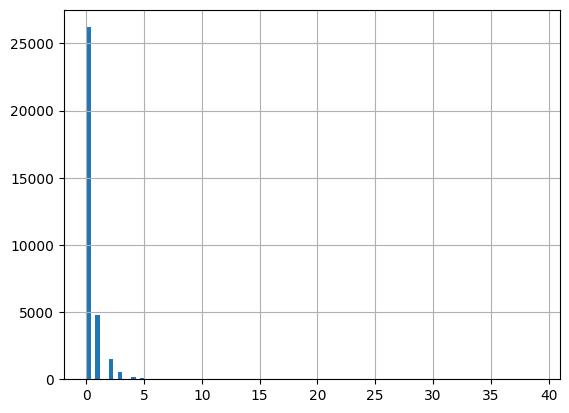

In [ ]:
df.number_bad_words.hist(bins=100)

<Axes: >

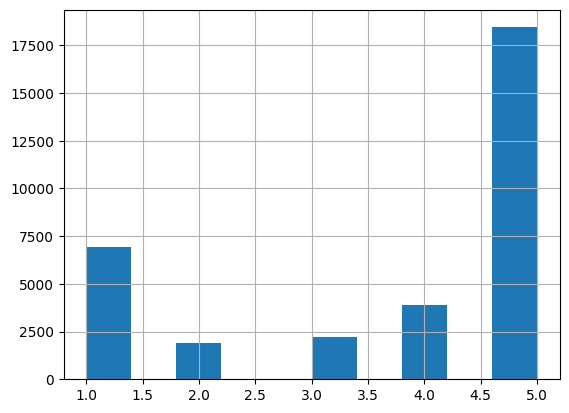

In [ ]:
df.rating.hist()

In [ ]:
df.loc[df['rating'].isin([1,2])]

,asin,rating,brand,price,number_words,number_bad_words
2,B0033SFV5A,1,Samsung,64.99,58,1
12,B0033SFV5A,1,Samsung,64.99,2,0
16,B0033SFV5A,2,Samsung,64.99,16,0
17,B0033SFV5A,1,Samsung,64.99,25,0
21,B0033SFV5A,1,Samsung,64.99,21,0
...,...,...,...,...,...,...
33368,B07Z41LHPB,1,Samsung,659.00,32,1
33369,B07ZDJCL76,2,Samsung,174.94,75,0
33378,B07ZDJCL76,2,Samsung,174.94,8,0
33399,B07ZDJCL76,1,Samsung,174.94,19,2


In [ ]:
df_by_item = df.groupby('title_y', as_index = False).agg({'price':'mean', 'rating':'mean', 'number_words':'sum', 'number_bad_words':'sum'})

KeyError: ignored

In [ ]:
df_by_item.head(5)

In [ ]:
df_by_item['bad_words_percent'] = 100*df_by_item['number_bad_words']/df_by_item['number_words']

In [ ]:
df_by_item.head(5)

In [ ]:
df_by_item.bad_words_percent.hist()

In [ ]:
import seaborn as sns

In [ ]:
corr_matrix=df_by_item[['price',	'rating', 'bad_words_percent']].corr()

In [ ]:
sns.heatmap(corr_matrix,annot=True)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(df_by_item['rating'], df_by_item['price'])
plt.show()

In [ ]:
df_by_item.head()

In [ ]:
items_df.head()

In [ ]:
df_by_item_brand = df_by_item.merge(items_df[['brand','title']],how='left', left_on = 'title_y', right_on='title').drop('title',axis=1)

In [ ]:
df_by_item_Apple = df_by_item_brand.loc[df_by_item_brand['brand']=='Apple']
df_by_item_Sam = df_by_item_brand.loc[df_by_item_brand['brand']=='Samsung']
df_by_item_Google = df_by_item_brand.loc[df_by_item_brand['brand']=='Google']

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.scatter(df_by_item_Apple['rating'], df_by_item_Apple['price'])

plt.subplot(1, 3, 2)
plt.scatter(df_by_item_Sam['rating'], df_by_item_Sam['price'])

plt.subplot(1, 3, 3)
plt.scatter(df_by_item_Google['rating'], df_by_item_Google['price'])

plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.scatter(df_by_item_Apple['bad_words_percent'], df_by_item_Apple['price'])

plt.subplot(1, 3, 2)
plt.scatter(df_by_item_Sam['bad_words_percent'], df_by_item_Sam['price'])

plt.subplot(1, 3, 3)
plt.scatter(df_by_item_Google['bad_words_percent'], df_by_item_Google['price'])

plt.show()

* less than 200 cheap
* 200 to 500 midle price
* more than 500  expensive

In [ ]:
cheap_items_df = items_df.loc[items_df['price']<200]
middle_items_df = items_df.loc[(items_df['price'] >=200) & (items_df['price']<500)]
expensive_items_df = items_df.loc[items_df['price']>500]